# Tugas 7-9

In [34]:
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT

c:\Users\Asus\anaconda3\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: d:\AI_SIB\nlp\Tugas\Tugas 7-9\irish-lyrics-eof.txt

  0%|          | 0.00/69.0k [00:00<?, ?B/s]
100%|██████████| 69.0k/69.0k [00:00<00:00, 365kB/s]
100%|██████████| 69.0k/69.0k [00:00<00:00, 363kB/s]


In [9]:
with open('irish-lyrics-eof.txt', 'r')as file:
    data = file.read()
    
str(data)

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy t

In [10]:
type(data)

str

In [12]:
corpus = data.lower().split('\n')
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [16]:
token = Tokenizer()
token.fit_on_texts(corpus)
total_words = len(token.word_index)+1

print(f'word idx director: {token.word_index}')
print(f'total: {total_words}')

word idx director: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through'

In [20]:
input_sequences = []

for line in corpus:
    token_list = token.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)
        
max_sequences_line = max([len(a) for a in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequences_line,padding='pre'))
xs, labels= input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
    

In [22]:
sentence = corpus[0].split()
print(f'sample: {sentence}')

token_list = []

for word in sentence:
    token_list.append(token.word_index[word])
    
print(token_list)

sample: ['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
[51, 12, 96, 1217, 48, 2, 69]


In [30]:
elem_number = 6

print(f'token list: {xs[elem_number]}')
print(f'decode to text: {token.sequences_to_texts([xs[elem_number]])}')

token list: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
decode to text: ['and']


In [28]:
print(f'one hot labels: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one hot labels: [0. 0. 0. ... 0. 0. 0.]
index of label: 11


In [31]:
elem_number = 8

print(f'token list: {xs[elem_number]}')
print(f'decode to text: {token.sequences_to_texts([xs[elem_number]])}')

print(f'one hot labels: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [ 0  0  0  0  0  0  0  0  0  0  0  0  2 11 15]
decode to text: ['and you that']
one hot labels: [0. 0. 0. ... 0. 0. 0.]
index of label: 31


In [37]:
total_words

2690

In [36]:
model = Sequential([
    Embedding(input_dim=total_words,output_dim=64,input_length= max_sequences_line-1),
    Bidirectional(LSTM(20)),
    Dense(total_words,activation='softmax')
])

model.compile(loss= 'categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

model.summary()

c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
hist = model.fit(xs,ys,epochs=100)

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.0507 - loss: 7.1224
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.0623 - loss: 6.3327
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.0664 - loss: 6.2113
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0658 - loss: 6.1210
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0712 - loss: 6.0690
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0795 - loss: 5.9897
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.0866 - loss: 5.9178
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0972 - loss: 5.8034
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0994 - loss: 5.7897
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1109 - loss: 5.6751
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1071 - loss: 5.5951
Epoch 12/100
377/377 ━━━━━━━━

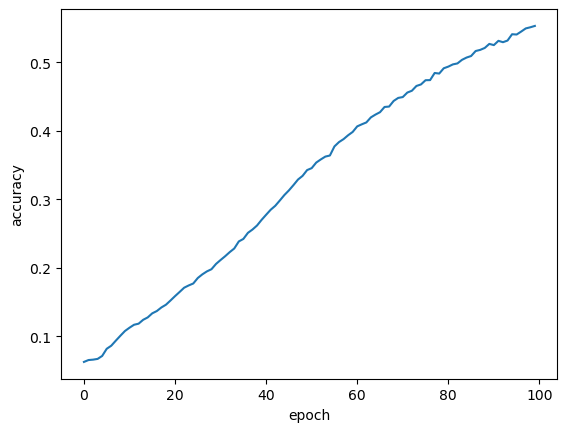

In [40]:
import matplotlib.pyplot as plt

def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.xlabel('epoch')
    plt.ylabel(string)
    plt.show()
    
plot_graph(hist,'accuracy')

In [41]:
seed_text = 'young maiden in her prime'

next_words = 50
for _ in range(next_words):
    token_list = token.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen= max_sequences_line-1,padding='pre')
    probability = model.predict(token_list)
    predicted = np.argmax(probability,axis=1)[0]
    if predicted != 0:
        output_word = token.index_word[predicted]
        seed_text += ' ' + output_word
        
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━

In [44]:
seed_text = 'young maiden in her prime'

next_words = 50
for _ in range(next_words):
    token_list = token.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen= max_sequences_line-1,padding='pre')
    probability = model.predict(token_list)
    choice = np.random.choice([1,2,3,4])
    predicted = np.argsort(probability,axis=1)[0][-choice]
    if predicted != 0:
        output_word = token.index_word[predicted]
        seed_text += ' ' + output_word
        
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

# Chatbot